In [ ]:
import numpy as np
import cvlib as cv
import cv2
from pathlib import Path
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('best_model.h5')
classes = ['Mask','No_Mask']

In [ ]:
PATH = '/content/test_images'
images = list(Path(PATH).glob('*'))

In [ ]:
frame = cv2.imread('/content/test_images/01.jpg', 1)
frame.shape

(225, 400, 3)

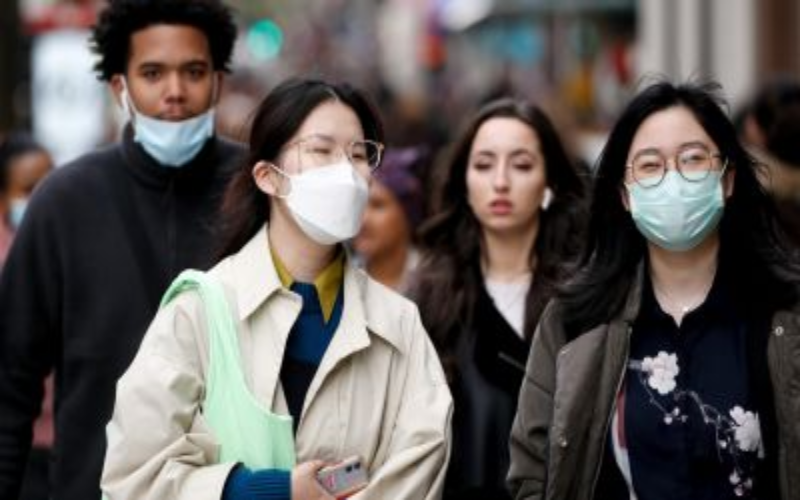

In [ ]:
# Resizing only for reducing loading visualization
cv2_imshow(cv2.resize(frame, (800,500)))

In [ ]:
# Editing real time detection notebook for testing loaded images
frame_img_detection = []

for path_img in images:
  # reading each image from path
  frame = cv2.imread(str(path_img), 1)

  # apply face detection
  face, confidence = cv.detect_face(frame)

  # loop through detected faces
  for idx, f in enumerate(face):

      # get corner points of face rectangle        
      (startX, startY) = f[0], f[1]
      (endX, endY) = f[2], f[3]

      # crop the detected face region
      face_crop = np.copy(frame[startY:endY,startX:endX]) 
      if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
          continue

      # preprocessing for mask detection model
      face_crop = cv2.resize(face_crop, (224, 224))
      face_crop = face_crop.astype("float") / 255.0
      face_crop = np.expand_dims(face_crop, axis=0)

      # apply mask detection on face
      conf = model.predict(face_crop, verbose=0) # PREDICTION
      pred = np.where(conf>0.5, 1, 0)
      pred = np.squeeze(pred, axis=1)

      # determine the color we'll use to draw the rectangle
      color = (0, 255, 0) if pred == 0 else (0, 0, 255)

      # draw rectangle over face
      cv2.rectangle(frame, (startX,startY), (endX,endY), color, 2)

      # get label with max accuracy
      label = classes[pred[0]]
      conf_value = 1-conf[0][0] if pred==0 else conf[0][0]
      label = "{}: {:.2f}%".format(label, conf_value * 100)

      Y = startY - 10 if startY - 10 > 10 else startY + 10

      # write label and confidence above face rectangle
      cv2.putText(frame, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                  0.7, color, 2)

  # saving data with detection
  frame_img_detection.append(frame)

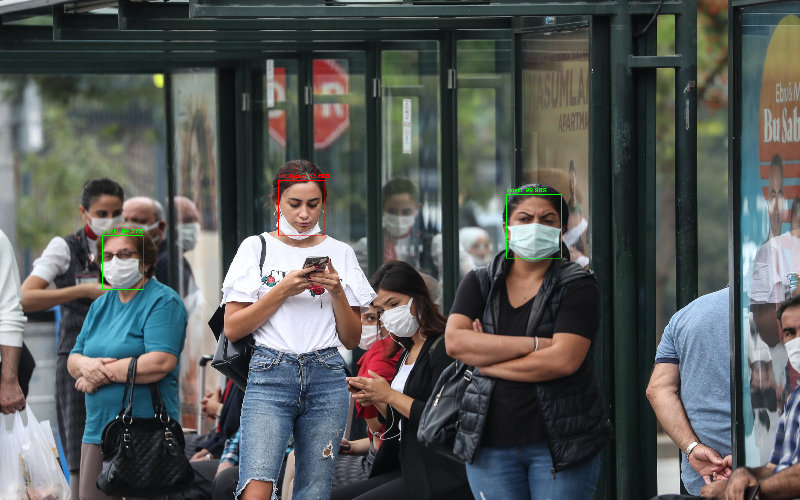

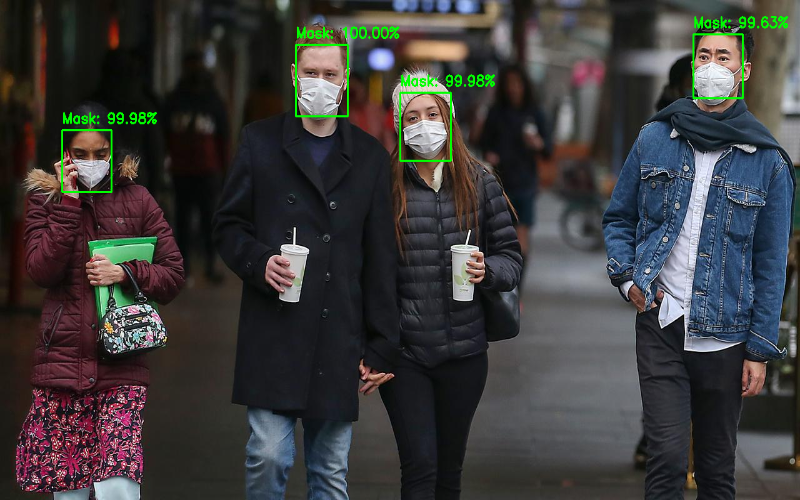

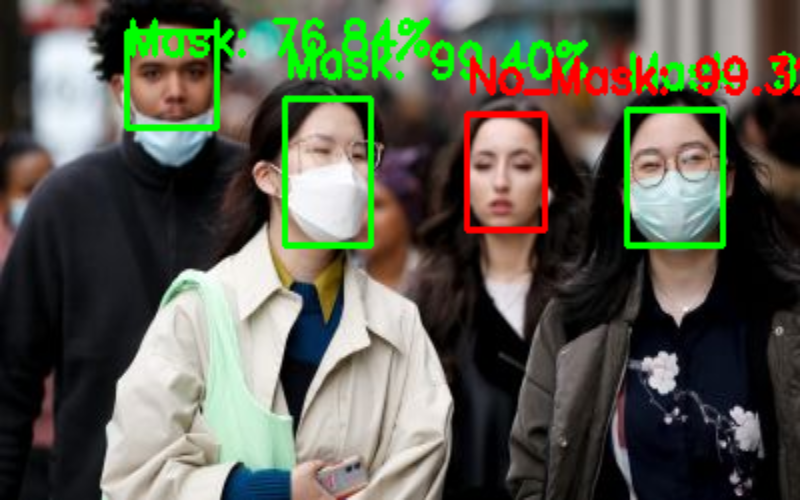

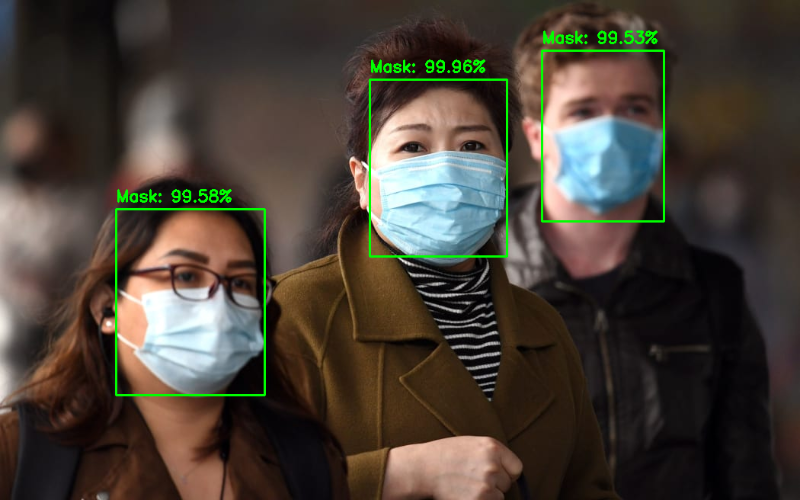

In [ ]:
# display output
for detection in frame_img_detection:
  cv2_imshow(cv2.resize(detection, (800,500)))